# PROJECT 1 PROPOSAL LEVEL 1
# Idea: Exploratory Data Analysis (EDA) on Retail Sales Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Cleaning

In [8]:
data = pd.read_csv('retail_sales_dataset.csv')
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [9]:
data.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [11]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


# Descriptive Statistics

In [12]:
# Calculate basic statistics
basic_stats = data.describe()

# Calculate mean for each numerical column
mean_values = data.mean()

# Calculate median for each numerical column
median_values = data.median()

# Calculate mode for each numerical column
mode_values = data.mode().iloc[0]  # Get the first row as mode

# Calculate standard deviation for each numerical column
std_values = data.std()

# Print the calculated statistics
print("Basic Statistics:")
print(basic_stats)

print("\nMean Values:")
print(mean_values)

print("\nMedian Values:")
print(median_values)

print("\nMode Values:")
print(mode_values)

print("\nStandard Deviation Values:")
print(std_values)

Basic Statistics:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000

Mean Values:
Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

Median Values:
Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      

C:\Users\KIIT\AppData\Local\Temp/ipykernel_5560/2108090973.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values = data.mean()
C:\Users\KIIT\AppData\Local\Temp/ipykernel_5560/2108090973.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values = data.median()
C:\Users\KIIT\AppData\Local\Temp/ipykernel_5560/2108090973.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_values = data.std()


# Time Series Analysis

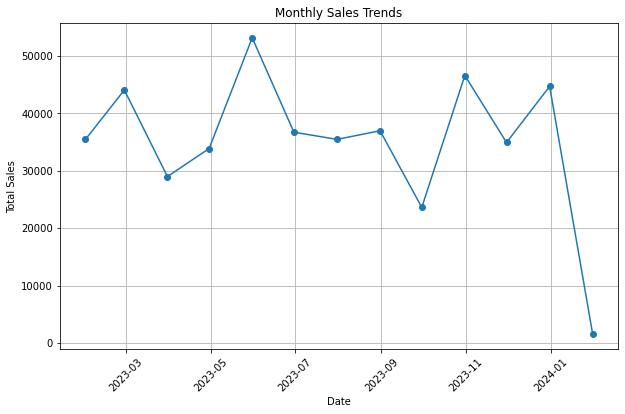

In [13]:
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Resample data to monthly frequency and calculate total sales
monthly_sales = data.resample('M').sum()

# Plot sales trends over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['Total Amount'], marker='o', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Customer and Product Analysis

In [15]:
# Customer Demographics Analysis
# Calculate average age of customers
average_age = data['Age'].mean()

# Calculate gender distribution of customers
gender_distribution = data['Gender'].value_counts(normalize=True)

# Purchasing Behavior Analysis
# Calculate total purchases made by each customer
total_purchases_per_customer = data.groupby('Customer ID')['Transaction ID'].count()

# Calculate total amount spent by each customer
total_spent_per_customer = data.groupby('Customer ID')['Total Amount'].sum()

# Identify high-value customers (e.g., top 10% based on total amount spent)
top_10_percent_customers = total_spent_per_customer.nlargest(int(len(total_spent_per_customer) * 0.10))

# Identify popular product categories among customers
popular_product_categories = data['Product Category'].value_counts()

# Print the analysis results
print("Customer Demographics Analysis:")
print("Average Age of Customers:", average_age)
print("Gender Distribution of Customers:\n", gender_distribution)

print("\nPurchase Behavior Analysis:")
print("Total Purchases per Customer:\n", total_purchases_per_customer)
print("Total Amount Spent per Customer:\n", total_spent_per_customer)
print("Top 10% High-Value Customers:\n", top_10_percent_customers)

print("\nPopular Product Categories:\n", popular_product_categories)


Customer Demographics Analysis:
Average Age of Customers: 41.392
Gender Distribution of Customers:
 Female    0.51
Male      0.49
Name: Gender, dtype: float64

Purchase Behavior Analysis:
Total Purchases per Customer:
 Customer ID
CUST001    1
CUST002    1
CUST003    1
CUST004    1
CUST005    1
          ..
CUST995    1
CUST996    1
CUST997    1
CUST998    1
CUST999    1
Name: Transaction ID, Length: 1000, dtype: int64
Total Amount Spent per Customer:
 Customer ID
CUST001     150
CUST002    1000
CUST003      30
CUST004     500
CUST005     100
           ... 
CUST995      30
CUST996      50
CUST997      90
CUST998     100
CUST999     150
Name: Total Amount, Length: 1000, dtype: int64
Top 10% High-Value Customers:
 Customer ID
CUST015    2000
CUST065    2000
CUST072    2000
CUST074    2000
CUST089    2000
           ... 
CUST859    1500
CUST869    1500
CUST942    1500
CUST956    1500
CUST031    1200
Name: Total Amount, Length: 100, dtype: int64

Popular Product Categories:
 Clothing     

# Visualization

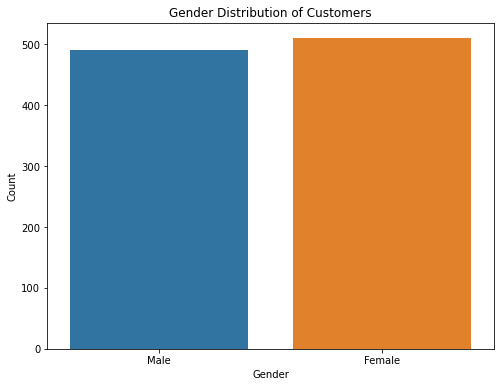

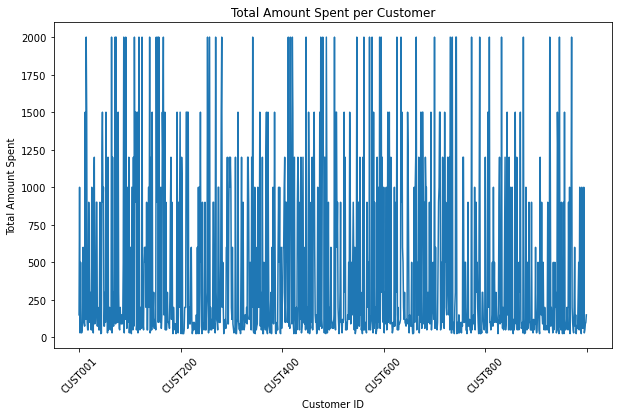

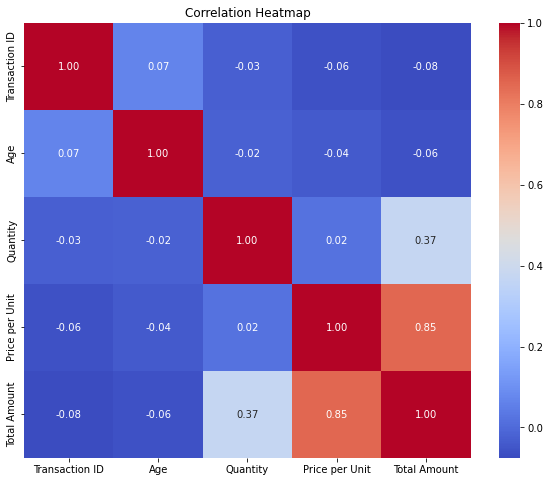

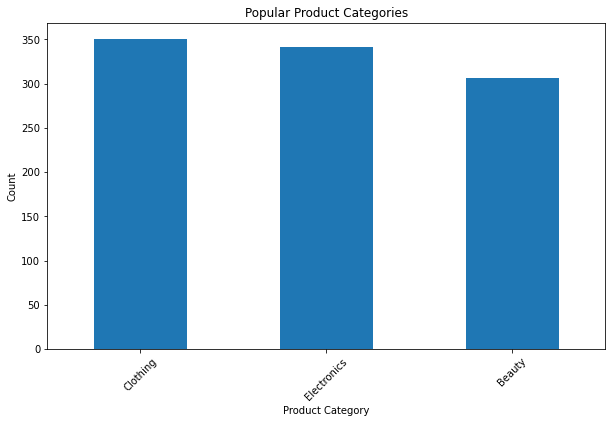

In [17]:
# Bar chart for gender distribution of customers
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Line plot for total amount spent per customer
plt.figure(figsize=(10, 6))
total_spent_per_customer.plot(kind='line')
plt.title('Total Amount Spent per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.show()

# Heatmap for correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Bar chart for popular product categories
plt.figure(figsize=(10, 6))
popular_product_categories.plot(kind='bar')
plt.title('Popular Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Recommendations

In [20]:
# Analyze customer demographics
customer_demographics = data.groupby('Customer ID').agg({'Gender': 'first', 'Age': 'first'}).reset_index()

# Calculate average customer age
average_customer_age = customer_demographics['Age'].mean()

# Calculate gender distribution
gender_distribution = customer_demographics['Gender'].value_counts(normalize=True)

# Analyze product category distribution
product_category_distribution = data['Product Category'].value_counts(normalize=True)

# Check the top-selling product categories
top_categories = product_category_distribution.head(3)

# Calculate total sales for each product category
total_sales_by_category = data.groupby('Product Category')['Total Amount'].sum()

# Identify the most profitable product categories
most_profitable_categories = total_sales_by_category.nlargest(3)

# Example recommendations
print("Recommendations:")
print("- Increase marketing efforts for the top-selling product categories:", top_categories.index.tolist())
print("- Focus on the most profitable product categories:", most_profitable_categories.index.tolist())
print("- Tailor marketing strategies based on customer demographics:")
print("  - Average customer age:", round(average_customer_age, 2))
print("  - Gender distribution:", gender_distribution.to_dict())


Recommendations:
- Increase marketing efforts for the top-selling product categories: ['Clothing', 'Electronics', 'Beauty']
- Focus on the most profitable product categories: ['Electronics', 'Clothing', 'Beauty']
- Tailor marketing strategies based on customer demographics:
  - Average customer age: 41.39
  - Gender distribution: {'Female': 0.51, 'Male': 0.49}
